In [2]:
import pandas as pd
import numpy as np
####

Country = "Hungary"
Country_abbr = "Hun" # Pol, Hun
text_name = "6641788832"+".txt"

####


df = pd.read_csv("../data/" + Country + '_DataFrame.csv')
''' Select data frame that ends at 2020-03 '''
end_index = None
for index in range(len(df)):
    if df.iloc[index, 0] == "2020-03":
        end_index = index
        break
assert (end_index is not None)


''' Scale the data '''
def scale_series(series, mean, std):
    return (series - mean)/std
for col_num in range(1, len(df.columns)):
    df.iloc[:, col_num] = scale_series(df.iloc[:, col_num], df.iloc[:end_index+1, col_num ].mean(), df.iloc[:end_index+1, col_num ].std())


In [3]:

file_path = "./Output/" + Country_abbr +"/corr/"


dict_weight = dict()

with open(file_path+text_name, "r") as f:
    is_Weight = False
    line = f.readline()
    while len(line.strip()):
        if line.strip().startswith("_") or line.strip().startswith("-"):
            line = f.readline()
            continue
        if is_Weight:
            
            name, weight = line.strip().split(":")
            name = name.strip()
            weight = weight.strip()
            weight = float(weight)
            dict_weight[name] = weight
        else:
            if line.startswith("Weight"):
                is_Weight = True
        line = f.readline()


In [4]:
df

,Date,Term_Premium,Risk_Premium,Stock_Prices_mom%_change,Stock_Prices_mom24mma%_change,Stock_Market_Volatility,REER,Current_Account_Balance_change_yryr%,Current_Account_Balance_over_GDP,One-Day_Repo_Rate_AVG,One-Day_Repo_Rate_EOP,Policy_Rate_&_Fed_Funds_Rate_Differential_AVG,Policy_Rate_&_Fed_Funds_Rate_Differential_EOP,Portfolio_Flows,Foreign_Exchange_Reserve_change_yryr%,Foreign_Exchange_Reserve_over_GDP,CPI yryrl,Bank Lending yryr%,Bank_Lending_mo12m%_change
0,1995-01,NaN,NaN,NaN,NaN,NaN,-1.600324,0.041278,NaN,2.144023,2.146553,2.107343,2.111269,NaN,NaN,NaN,NaN,NaN,NaN
1,1995-02,NaN,NaN,NaN,NaN,NaN,-1.579279,0.065624,NaN,2.548953,2.551214,2.570265,2.573974,NaN,NaN,NaN,NaN,NaN,NaN
2,1995-03,NaN,NaN,NaN,NaN,NaN,-1.837566,0.087029,NaN,2.548953,2.551214,2.536720,2.540445,NaN,NaN,NaN,NaN,NaN,NaN
3,1995-04,NaN,NaN,NaN,NaN,NaN,-1.999033,0.067706,NaN,2.548953,2.551214,2.486402,2.490151,NaN,NaN,NaN,NaN,NaN,NaN
4,1995-05,NaN,NaN,NaN,NaN,NaN,-1.966650,0.033193,-1.284600,2.548953,2.551214,2.558524,2.562239,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2023-05,0.876482,-0.842216,0.728032,-0.381073,-2.019244,0.792142,-0.045912,0.773616,0.524301,0.527907,0.225464,0.230274,-0.440051,0.616121,-0.497021,NaN,NaN,NaN
341,2023-06,0.725608,-0.232841,0.951813,-0.061382,-2.158206,0.876019,-0.039397,0.911030,0.524301,0.527907,0.225464,0.230274,-2.385665,0.274788,-0.671333,NaN,NaN,NaN
342,2023-07,0.331013,-0.283623,0.765711,0.209113,-1.704392,0.739999,NaN,NaN,0.524301,0.527907,0.183533,0.188362,2.046642,0.873686,NaN,NaN,NaN,NaN
343,2023-08,0.098899,-0.080498,0.578278,0.423812,-2.793304,0.594802,NaN,NaN,0.524301,0.527907,0.183533,0.188362,NaN,0.708556,NaN,NaN,NaN,NaN


In [5]:

df = df[["Date",*dict_weight.keys()]].dropna().reset_index()


In [6]:
df

,index,Date,Risk_Premium,Stock_Prices_mom%_change,Stock_Prices_mom24mma%_change,Stock_Market_Volatility,One-Day_Repo_Rate_EOP,Policy_Rate_&_Fed_Funds_Rate_Differential_EOP,Foreign_Exchange_Reserve_change_yryr%
0,95,2002-12,0.156481,-0.421848,-0.244736,0.803379,-0.079085,0.133038,-0.661157
1,96,2003-01,0.399103,-0.762972,-0.437900,1.251478,-0.348859,-0.230755,2.299487
2,97,2003-02,0.190336,-0.707530,-0.591388,1.033629,-0.348859,-0.230755,1.930623
3,98,2003-03,0.179051,0.331061,-0.461935,1.071766,-0.348859,-0.239137,1.741353
4,99,2003-04,0.342679,1.448266,-0.020099,0.883174,-0.348859,-0.227402,1.000894
...,...,...,...,...,...,...,...,...,...
245,340,2023-05,-0.842216,0.728032,-0.381073,-2.019244,0.527907,0.230274,0.616121
246,341,2023-06,-0.232841,0.951813,-0.061382,-2.158206,0.527907,0.230274,0.274788
247,342,2023-07,-0.283623,0.765711,0.209113,-1.704392,0.527907,0.188362,0.873686
248,343,2023-08,-0.080498,0.578278,0.423812,-2.793304,0.527907,0.188362,0.708556


In [7]:

FCI = np.matmul(df[dict_weight.keys()],np.square(list(dict_weight.values())))
Date = df["Date"]
df_output = pd.DataFrame({"Date":Date, "FCI":FCI})

end_index = None
for index in range(len(df)):
    if df_output.iloc[index, 0] == "2020-03":
        end_index = index
        break
assert (end_index is not None)
for col_num in range(1, len(df_output.columns)):
    df_output.iloc[:, col_num] = scale_series(df_output.iloc[:, col_num], df_output.iloc[:end_index+1, col_num ].mean(), df_output.iloc[:end_index+1, col_num ].std())

df_output.to_csv("Output/" + Country_abbr+"/FCI.csv", index = False)
df_output.to_csv("PCA results for visualization/"+ Country + "/FCI.csv", index = False)


In [8]:
df2 = pd.read_csv("IMF_FCI_Hungary.csv")
df_output = df_output.merge(df2, on = "Date", how = "left")

end_index = None
for index in range(len(df)):
    if df_output.iloc[index, 0] == "2020-03":
        end_index = index
        break
assert (end_index is not None)
for col_num in range(1, len(df_output.columns)):
    df_output.iloc[:, col_num] = scale_series(df_output.iloc[:, col_num], df_output.iloc[:end_index+1, col_num ].mean(), df_output.iloc[:end_index+1, col_num ].std())



In [9]:
df_output

,Date,FCI,IMF_FCI
0,2002-12,-0.099128,0.331806
1,2003-01,-0.093404,0.332895
2,2003-02,-0.230100,0.286956
3,2003-03,0.436288,0.254526
4,2003-04,1.203808,0.467028
...,...,...,...
245,2023-05,-0.276068,NaN
246,2023-06,-0.035263,NaN
247,2023-07,0.159402,NaN
248,2023-08,-0.180997,NaN


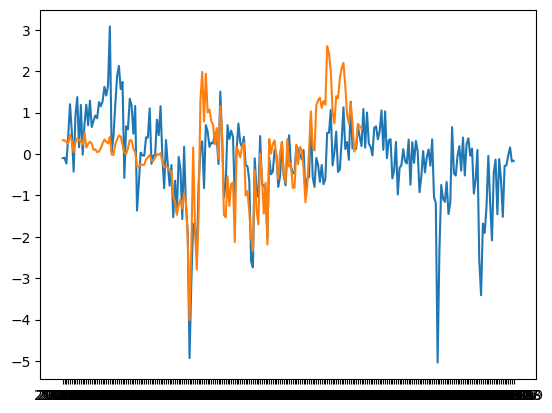

In [10]:

import matplotlib.pyplot as plt
plt.plot(df_output["Date"], df_output["FCI"])
plt.plot(df_output["Date"], df_output["IMF_FCI"])


In [135]:
np.corrcoef(df_output.dropna()["FCI"], df_output["IMF_FCI"].dropna())


array([[ 1.        , -0.32521235],
       [-0.32521235,  1.        ]])